In [1]:
# Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import load_iris
from econml.sklearn_extensions.model_selection import SearchEstimatorList
import warnings
import numpy as np
from econml.dml import LinearDML, CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Ignore the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

%matplotlib inline

# SearchEstimatorList

The SearchEstimatorList class is a custom Python class designed to streamline the process of training multiple machine learning models and tuning their hyperparameters. This class can be especially useful when you're unsure which model will perform best on your data and you want to compare several of them.

# Key Features

    Multiple Model Training: The SearchEstimatorList class takes a list of Scikit-learn estimators (machine learning models) and trains each of them on your data.

    Hyperparameter Tuning: For each model, the class conducts a grid search over a provided range of hyperparameters. This allows you to automatically find the hyperparameters that result in the best model performance.

    Model Evaluation: The class retains the best performing model based on a specified scoring metric. This makes it easy to determine which model and hyperparameters are the most suitable for your data.

    Data Scaling: The SearchEstimatorList class also supports data scaling, which can be important for certain types of models.

    Handling of Different Target Types: This class handles both continuous and discrete target variables, making it suitable for both regression and classification tasks.

# Usage

To use the SearchEstimatorList class, you start by initializing an instance of the class with a list of models and their corresponding hyperparameter grids. Then, you call the fit method to train the models and conduct the grid search. After fitting, you can use the predict method to generate predictions for new data. The class also has methods to refit the best model using the entire dataset (refit) and to return the best model (best_model).

# Classifier

In [7]:
# Load the Iris dataset for classification
iris = load_iris()

# Split the dataset into training and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Define models and their parameter grids
estimator_list_cls = ['forest', 'gbf']
param_grid_list_cls = [{'n_estimators': [50, 100, 150]}, {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}]

# Initialize SearchEstimatorList
sel_cls = SearchEstimatorList(
    estimator_list=estimator_list_cls, 
    param_grid_list=param_grid_list_cls, 
    is_discrete=True,
    verbose=3
)

# Fit the model to the training data
sel_cls.fit(X_train_cls, y_train_cls)

# Predict outcomes for the test set
predictions_cls = sel_cls.predict(X_test_cls)

# Evaluate the model
acc = accuracy_score(y_test_cls, predictions_cls)

# Print the evaluation metric
print(f"Accuracy: {acc}")



No scoring value was given. Using default score method f1_macro.


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END ...................n_estimators=50;, score=0.916 total time=   0.1s
[CV 2/2] END ...................n_estimators=50;, score=0.950 total time=   0.1s
[CV 1/2] END ..................n_estimators=100;, score=0.916 total time=   0.1s
[CV 2/2] END ..................n_estimators=100;, score=0.950 total time=   0.1s
[CV 1/2] END ..................n_estimators=150;, score=0.916 total time=   0.1s
[CV 2/2] END ..................n_estimators=150;, score=0.950 total time=   0.1s
Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END learning_rate=0.01, n_estimators=50;, score=0.900 total time=   0.0s
[CV 2/2] END learning_rate=0.01, n_estimators=50;, score=0.950 total time=   0.0s
[CV 1/2] END learning_rate=0.01, n_estimators=100;, score=0.900 total time=   0.0s
[CV 2/2] END learning_rate=0.01, n_estimators=100;, score=0.950 total time=   0.1s
[CV 1/2] END learning_rate=0.01, n_estimators=150;, score=0.900 t

# Regressor

In [3]:
# Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import fetch_california_housing
from econml.sklearn_extensions.model_selection import SearchEstimatorList

# Load the Boston Housing dataset for regression
california_housing = fetch_california_housing()

# Split the dataset into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    california_housing.data, california_housing.target, test_size=0.2, random_state=42
)

# Define models and their parameter grids
# This will use ElasticNet because it's a Linear Model and a Neural Network Regressor
estimator_list_reg = ['linear', 'nnet']
param_grid_list_reg = [{'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]}, {'hidden_layer_sizes': [50, 100, 200]}]

# Initialize SearchEstimatorList
sel_reg = SearchEstimatorList(
    estimator_list=estimator_list_reg, 
    param_grid_list=param_grid_list_reg,
    is_discrete=False,
    verbose=3
)

# Fit the model to the training data
sel_reg.fit(X_train_reg, y_train_reg)

# Predict outcomes for the test set
predictions_reg = sel_reg.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, predictions_reg)

# Print the evaluation metric
print(f"Mean Squared Error: {mse}")



Fitting 2 folds for each of 7 candidates, totalling 14 fits


/Users/anthonycampbell/Documents/EconML-CS696DS/econml/sklearn_extensions/model_selection.py:346: UserWarning: No scoring value was given. Using default score method neg_mean_squared_error.
  warnings.warn(f"No scoring value was given. Using default score method {self.scoring}.")


[CV 1/2] END .....................l1_ratio=0.1;, score=-0.584 total time=   0.0s
[CV 2/2] END .....................l1_ratio=0.1;, score=-0.725 total time=   0.0s
[CV 1/2] END .....................l1_ratio=0.5;, score=-0.549 total time=   0.0s
[CV 2/2] END .....................l1_ratio=0.5;, score=-0.675 total time=   0.0s
[CV 1/2] END .....................l1_ratio=0.7;, score=-0.546 total time=   0.0s
[CV 2/2] END .....................l1_ratio=0.7;, score=-0.668 total time=   0.0s
[CV 1/2] END .....................l1_ratio=0.9;, score=-0.544 total time=   0.0s
[CV 2/2] END .....................l1_ratio=0.9;, score=-0.663 total time=   0.0s
[CV 1/2] END ....................l1_ratio=0.95;, score=-0.544 total time=   0.0s
[CV 2/2] END ....................l1_ratio=0.95;, score=-0.662 total time=   0.0s
[CV 1/2] END ....................l1_ratio=0.99;, score=-0.544 total time=   0.0s
[CV 2/2] END ....................l1_ratio=0.99;, score=-0.661 total time=   0.0s
[CV 1/2] END ...............

# Using all estimators

In [4]:
search = SearchEstimatorList(estimator_list = ['linear', 'forest', 'gbf', 'nnet', 'poly'], is_discrete=True)


/Users/anthonycampbell/Documents/EconML-CS696DS/econml/sklearn_extensions/model_selection.py:346: UserWarning: No scoring value was given. Using default score method f1_macro.
  warnings.warn(f"No scoring value was given. Using default score method {self.scoring}.")


# Single Estimators and Model Objects

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    from sklearn.linear_model import LogisticRegression
    lr_param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [50, 100, 200, 500],
    }

    search = SearchEstimatorList(estimator_list = LogisticRegression(), param_grid_list= lr_param_grid, verbose=0, is_discrete=True)
    search.fit(X_train_cls, y_train_cls)
    print(search.best_model())
    print(search.best_params_)
    y_pred = search.predict(X_test_cls)

    mse = mean_squared_error(y_test_cls, y_pred)

print("mse of test dataset:", mse,)
print(search.predict_proba(X_test_cls))



Best estimator LogisticRegression(C=0.001, max_iter=50, penalty='none', solver='sag') and best score 0.966624895572264 and best params {'C': 0.001, 'max_iter': 50, 'penalty': 'none', 'solver': 'sag'}
LogisticRegression(C=0.001, max_iter=50, penalty='none', solver='sag')
{'C': 0.001, 'max_iter': 50, 'penalty': 'none', 'solver': 'sag'}
mse of test dataset: 0.0
[[7.30818687e-04 9.18278306e-01 8.09908750e-02]
 [9.96517769e-01 3.48223146e-03 9.52705844e-13]
 [8.11833119e-11 2.27064968e-04 9.99772935e-01]
 [1.49082115e-03 8.82474441e-01 1.16034738e-01]
 [6.61814371e-04 9.57060549e-01 4.22776371e-02]
 [9.94291457e-01 5.70854348e-03 8.51181731e-12]
 [3.09570872e-02 9.66175329e-01 2.86758338e-03]
 [1.03620286e-04 2.72711857e-01 7.27184523e-01]
 [1.86273814e-04 5.89659675e-01 4.10154051e-01]
 [7.89829063e-03 9.84383361e-01 7.71834853e-03]
 [1.79967697e-04 3.80342060e-01 6.19477972e-01]
 [9.87625715e-01 1.23742845e-02 6.37903013e-11]
 [9.97989545e-01 2.01045508e-03 2.71212460e-13]
 [9.87073806e-0

# Polynomial Feature


In [6]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # For polynomial, please ensure that you have "poly__" (two "_" or underscores after poly) underneath to change degree
    # To change the linear method please add "linear__" (two "_" or underscores after linear)
    param_grid_list_poly = {'poly__degree': [2, 3, 4], 'linear__l1_ratio': [0.1, 0.5, 0.9]}
    sel_reg = SearchEstimatorList(
        estimator_list='poly', 
        param_grid_list=param_grid_list_poly,
        is_discrete=False,
        scoring='explained_variance',
        verbose=3
    )

    # Fit the model to the training data
    sel_reg.fit(X_train_reg, y_train_reg)

    # Predict outcomes for the test set
    predictions_reg = sel_reg.predict(X_test_reg)

    # Evaluate the model
    mse = mean_squared_error(y_test_reg, predictions_reg)

    # Print the evaluation metric
    print(f"Mean Squared Error: {mse}")


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END linear__l1_ratio=0.1, poly__degree=2;, score=0.322 total time=   0.3s
[CV 2/2] END linear__l1_ratio=0.1, poly__degree=2;, score=0.287 total time=   0.2s
[CV 1/2] END linear__l1_ratio=0.1, poly__degree=3;, score=0.000 total time=   0.3s
[CV 2/2] END linear__l1_ratio=0.1, poly__degree=3;, score=0.014 total time=   0.3s
[CV 1/2] END linear__l1_ratio=0.1, poly__degree=4;, score=0.000 total time=   1.0s
[CV 2/2] END linear__l1_ratio=0.1, poly__degree=4;, score=-0.000 total time=   1.1s
[CV 1/2] END linear__l1_ratio=0.5, poly__degree=2;, score=0.322 total time=   0.3s
[CV 2/2] END linear__l1_ratio=0.5, poly__degree=2;, score=0.287 total time=   0.2s
[CV 1/2] END linear__l1_ratio=0.5, poly__degree=3;, score=0.000 total time=   0.3s
[CV 2/2] END linear__l1_ratio=0.5, poly__degree=3;, score=0.014 total time=   0.4s
[CV 1/2] END linear__l1_ratio=0.5, poly__degree=4;, score=0.000 total time=   1.5s
[CV 2/2] END linear__l1_ra

In [7]:
# These are all of the supported models that we have that have built in hyper parameters already included
print(sel_reg.supported_models)

['linear', 'forest', 'gbf', 'nnet', 'poly']


In [8]:
# To try every type of model simply use the "all" option
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sel_reg = SearchEstimatorList(
        estimator_list='all', 
        param_grid_list=None,
        is_discrete=False,
        scaling=True,
        verbose=5
    )

    # Fit the model to the training data
    sel_reg.fit(X_train_reg, y_train_reg)

    # Predict outcomes for the test set
    predictions_reg = sel_reg.predict(X_test_reg)

    # Evaluate the model
    mse = mean_squared_error(y_test_reg, predictions_reg)

    # Print the evaluation metric
    print(f"Mean Squared Error: {mse}")

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END .................................., score=-0.518 total time=   0.1s
[CV 2/2] END .................................., score=-0.552 total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END .................................., score=-0.287 total time=   1.3s
[CV 2/2] END .................................., score=-0.293 total time=   1.3s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END .................................., score=-0.286 total time=   3.1s
[CV 2/2] END .................................., score=-0.274 total time=   3.1s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END .................................., score=-0.305 total time=   3.2s
[CV 2/2] END .................................., score=-0.305 total time=   3.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END .................................., score=-0

# Scoring functions

Using a custom scoring function. See https://scikit-learn.org/stable/modules/model_evaluation.html for how to make your own scoring metric


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse
loss_function  = make_scorer(root_mean_squared_error, greater_is_better=False)

sel_reg = SearchEstimatorList(
    estimator_list=estimator_list_reg, 
    param_grid_list=None,
    is_discrete=False,
    scoring=loss_function,
    verbose=3
)

# Fit the model to the training data
sel_reg.fit(X_train_reg, y_train_reg)

# Predict outcomes for the test set
predictions_reg = sel_reg.predict(X_test_reg)

# Evaluate the model
rmse = root_mean_squared_error(y_test_reg, predictions_reg)

# Print the evaluation metric
print(f"Root Mean Squared Error: {rmse}")

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END .................................., score=-0.741 total time=   0.0s
[CV 2/2] END .................................., score=-0.822 total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END .................................., score=-2.404 total time=   0.8s
[CV 2/2] END .................................., score=-1.671 total time=   0.8s
Best estimator ElasticNetCV() and best score -0.7813657065847333 and best params {}
Root Mean Squared Error: 0.7490149943228499


# What this means for EconML?

By integrating the SearchEstimatorList into econml, we can gain a number of benefits in these categories:

    Model Selection: econml contains many different models, each with its own assumptions and use cases. By using SearchEstimatorList, you can more easily compare the performance of different models on your data and select the best one.

    Hyperparameter Tuning: Many of the models in econml have hyperparameters that need to be tuned for optimal performance. SearchEstimatorList can automate this process by performing a grid search over specified hyperparameters for each model.

    Efficiency: Instead of having to manually train each model and tune its hyperparameters, SearchEstimatorList can do this all at once. This can save a significant amount of time and make the model building process more efficient.

See the example below with data taken fromt he Customer Segmentation at an Online Media Company Notebook

In [2]:
# Import the sample pricing data
file_url = "https://msalicedatapublic.z5.web.core.windows.net/datasets/Pricing/pricing_sample.csv"
train_data = pd.read_csv(file_url)

# Data sample
train_data.head()

# Define estimator inputs
train_data["log_demand"] = np.log(train_data["demand"])
train_data["log_price"] = np.log(train_data["price"])

Y = train_data["log_demand"].values
T = train_data["log_price"].values
X = train_data[["income"]].values  # features
confounder_names = ["account_age", "age", "avg_hours", "days_visited", "friends_count", "has_membership", "is_US", "songs_purchased"]
W = train_data[confounder_names].values

# Get test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
X_test_data = pd.DataFrame(X_test, columns=["income"])

# initiate an EconML cate estimator
est = LinearDML(model_y='gbf', model_t='gbf',
              featurizer=PolynomialFeatures(degree=2, include_bias=False))

# fit through dowhy
est_dw = est.dowhy.fit(Y, T, X=X, W=W, outcome_names=["log_demand"], treatment_names=["log_price"], feature_names=["income"],
               confounder_names=confounder_names, inference="statsmodels")

lineardml_estimate = est_dw.estimate_
print(lineardml_estimate)


No scoring value was given. Using default score method neg_mean_squared_error.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[log_demand|income,friends_count,days_⟨visited,⟩_hours,age,songs
d[log_price]                                                                  

                                             
_purchased,has_membership,is_US,account_age])
                                             
Estimand assumption 1, Unconfoundedness: If U→{log_price} and U→log_demand then P(log_demand|log_price,income,friends_count,days_visited,avg_hours,age,songs_purchased,has_membership,is_US,account_age,U) = P(log_demand|log_price,income,friends_count,days_visited,avg_hours,age,songs_purchased,has_membership,is_US,account_age)

## Realized estimand
b: log_demand~log_price+income+friends_count+days_visited+avg_hours+age+songs_purchased+has_membership+is_US+account_age | income
Ta

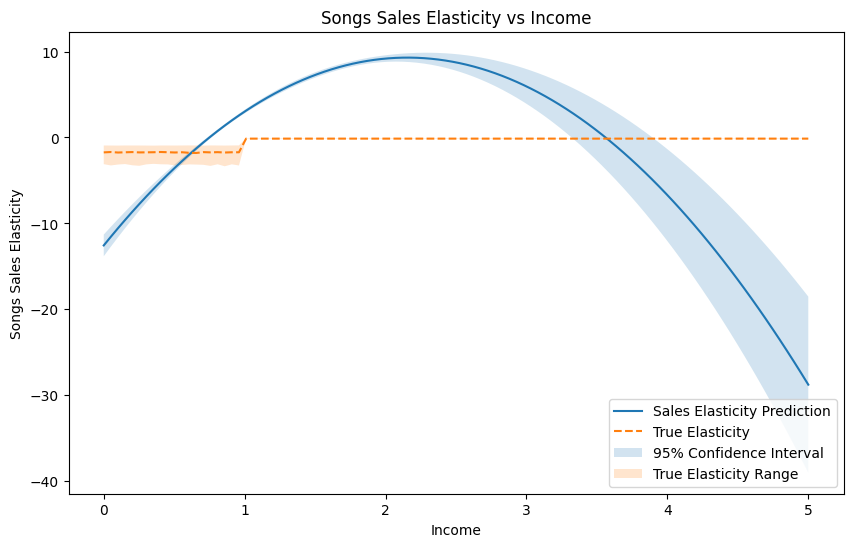

In [3]:
# Define underlying treatment effect function given DGP
def gamma_fn(X):
    return -3 - 14 * (X["income"] < 1)

def beta_fn(X):
    return 20 + 0.5 * (X["avg_hours"]) + 5 * (X["days_visited"] > 4)

def demand_fn(data, T):
    Y = gamma_fn(data) * T + beta_fn(data)
    return Y

def true_te(x, n, stats):
    if x < 1:
        subdata = train_data[train_data["income"] < 1].sample(n=n, replace=True)
    else:
        subdata = train_data[train_data["income"] >= 1].sample(n=n, replace=True)
    te_array = subdata["price"] * gamma_fn(subdata) / (subdata["demand"])
    if stats == "mean":
        return np.mean(te_array)
    elif stats == "median":
        return np.median(te_array)
    elif isinstance(stats, int):
        return np.percentile(te_array, stats)

# Get the estimate and range of true treatment effect
truth_te_estimate = np.apply_along_axis(true_te, 1, X_test, 1000, "mean")  # estimate
truth_te_upper = np.apply_along_axis(true_te, 1, X_test, 1000, 95)  # upper level
truth_te_lower = np.apply_along_axis(true_te, 1, X_test, 1000, 5)  # lower level

te_pred = est_dw.effect(X_test).flatten()
te_pred_interval = est_dw.effect_interval(X_test)

# Compare the estimate and the truth
plt.figure(figsize=(10, 6))
plt.plot(X_test.flatten(), te_pred, label="Sales Elasticity Prediction")
plt.plot(X_test.flatten(), truth_te_estimate, "--", label="True Elasticity")
plt.fill_between(
    X_test.flatten(),
    te_pred_interval[0].flatten(),
    te_pred_interval[1].flatten(),
    alpha=0.2,
    label="95% Confidence Interval",
)
plt.fill_between(
    X_test.flatten(),
    truth_te_lower,
    truth_te_upper,
    alpha=0.2,
    label="True Elasticity Range",
)
plt.xlabel("Income")
plt.ylabel("Songs Sales Elasticity")
plt.title("Songs Sales Elasticity vs Income")
plt.legend(loc="lower right")

In [18]:
# initiate an EconML cate estimator

est = LinearDML(model_y=['forest', 'nnet'], model_t=['nnet', 'forest'], scaling=False,
              featurizer=PolynomialFeatures(degree=2, include_bias=False))

# fit through dowhy
est_dw = est.dowhy.fit(Y, T, X=X, W=W, outcome_names=["log_demand"], treatment_names=["log_price"], feature_names=["income"],
               confounder_names=confounder_names, inference="statsmodels")

lineardml_estimate = est_dw.estimate_
print(lineardml_estimate)

No scoring value was given. Using default score method neg_mean_squared_error.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Processing estimator: RandomForestRegressor
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .................................................... total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................................................... total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Processing estimator: MLPRegressor
Fitting 2 folds for each of 1 candidates, totalling 2 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .................................................... total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .................................................... total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best estimator RandomForestRegressor() and best score -0.007087413279468611 and best params {}
Processing estimator: RandomForestRegressor
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .................................................... total time=   2.3s
[CV] END .................................................... total time=   2.3s
Processing estimator: MLPRegressor
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .................................................... total time=  12.6s
[CV] END .................................................... total time=  10.5s
Best estimator RandomForestRegressor() and best score -0.015753967716546576 and best params {}
Processing estimator: RandomForestRegressor
Fitting 2 folds for each of 1 candidates, totalling 2 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................................................... total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END .................................................... total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Processing estimator: MLPRegressor
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .................................................... total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .................................................... total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best estimator RandomForestRegressor() and best score -0.006845612318994855 and best params {}
Processing estimator: RandomForestRegressor
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .................................................... total time=   2.2s
[CV] END .................................................... total time=   2.1s
Processing estimator: MLPRegressor
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .................................................... total time=  12.2s
[CV] END .................................................... total time=  14.3s
Best estimator RandomForestRegressor() and best score -0.014455828883075759 and best params {}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[log_demand|income,friends_count,days_⟨visited,⟩_hou

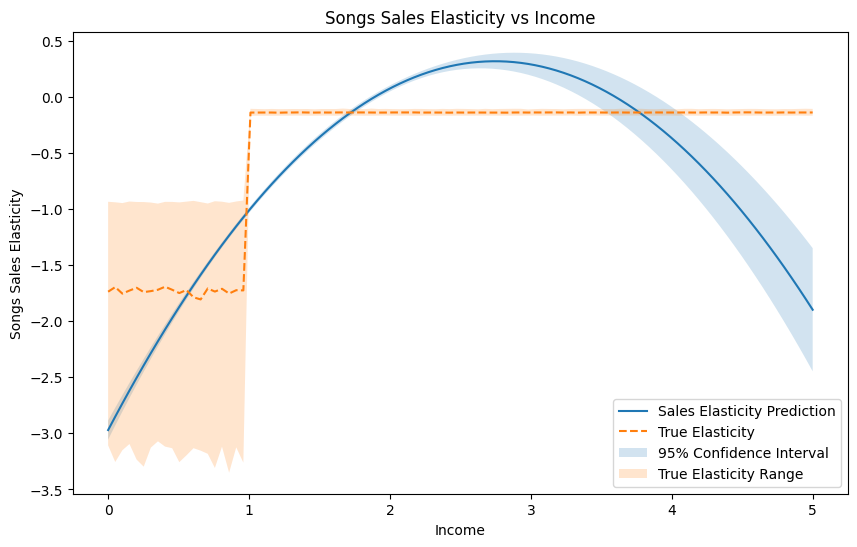

In [19]:
te_pred = est_dw.effect(X_test).flatten()
te_pred_interval = est_dw.effect_interval(X_test)

# Compare the estimate and the truth
plt.figure(figsize=(10, 6))
plt.plot(X_test.flatten(), te_pred, label="Sales Elasticity Prediction")
plt.plot(X_test.flatten(), truth_te_estimate, "--", label="True Elasticity")
plt.fill_between(
    X_test.flatten(),
    te_pred_interval[0].flatten(),
    te_pred_interval[1].flatten(),
    alpha=0.2,
    label="95% Confidence Interval",
)
plt.fill_between(
    X_test.flatten(),
    truth_te_lower,
    truth_te_upper,
    alpha=0.2,
    label="True Elasticity Range",
)
plt.xlabel("Income")
plt.ylabel("Songs Sales Elasticity")
plt.title("Songs Sales Elasticity vs Income")
plt.legend(loc="lower right")